In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def int_to_binary_arr (n):
    arr = np.zeros (10)
    i = 0
    while (n > 0):
        arr[i] = (n % 2)
        i += 1
        n //= 2
    return arr[::-1]


# Plots E_in and E_val
def plot_error (n, errors_list, labels_list):
    ax = plt.gca ()
    x = range (1, n + 1)
    for i, error_t in enumerate (errors_list):
        plt.plot (x, error_t, label = labels_list[i])    
    handlers, labels = ax.get_legend_handles_labels ()
    ax.legend (handlers, labels, loc = 'upper right', numpoints = 1)
    plt.ylabel ('Relative error')
    plt.xlabel ('Number of images sampled x35000')
    plt.show ()
    plt.clf ()
    
    
# Given a set of size N, returns a random partition of this set
# containing two subsets of size N - k and k
def validation_partition (data_set, k):
    np.random.shuffle (data_set)
    return (data_set[k:], data_set[:k])


# Calculates error of a data set
def avg_error (data_set, X, Y, cost):
    data_set_size = data_set.shape[0]
    err = 0
    for i in range (data_set_size):
        features = np.empty ([1, features_size])
        features[0, :] = data_set[i, 1:]
        label = np.empty ([1, output_size])
        label[0, :] = int_to_binary_arr (data_set[i, 0])
            
        # Forward propagation and error calculation
        e = sess.run (cost, {X: features, Y: label})
        err += e
    return err / data_set_size

# MAC0460/5832 - Lista 3: Redes Neurais - MNIST

### Data de Entrega: 23h55m do dia 23/06/2017

##### Classificação de dígitos
Os dataset para esta tarefa foi tirado da competição do kaggle de reconhecimento de dígitos (https://www.kaggle.com/c/digit-recognizer) e está disponível em http://vision.ime.usp.br/~caiomr/mac0460_5832/train.csv.gz. O dataset está sob a licença Creative Commons Attribution-Share Alike 3.0 license (https://creativecommons.org/licenses/by-sa/3.0/). O dataset foi zipado, mas os dados estão inalterados. Cada linha (amostra) do arquivo contém 785 colunas: a primeira informa o label da amostra e as outras 784 são os valores dos pixels da imagem (28 x 28) que representa o dígito.

Q1. Projete uma rede neural para resolver o problema de classificação de dígitos. Baixe o arquivo train.csv.gz (link acima) e dezipe-o para a pasta data/. Verifique que as células abaixo executam com sucesso e exibem o resultado esperado. Utilize os pacotes de python tensorflow (https://www.tensorflow.org/) ou theano (http://deeplearning.net/software/theano/) para implementar sua rede neural. Escolha o que preferir/tiver mais familiaridade - ou o quiser passar a ter mais familiaridade :) - para definir sua rede neural. Usem a arquitetura 3-layer NN 300+100 hidden units (erro 3.05%), como descrito no site http://yann.lecun.com/exdb/mnist/index.html.


Façam os três seguintes experimentos:

1. Imagem original.
2. Imagem amostrada com passo 1, isto é, reduz a imagem para 1/4 do número total de pixels.
3. Imagem amostrada com passo 2, isto é, reduz a imagem para 1/16 do número total de pixels.


Em cada experimento, execute os seguintes procedimentos:
1. Compute a curva experimental de aprendizado (N = 5000, N = 10000, N = 15000, ... N = 35000), estimar o $E_{out}$ a partir das 7000 amostras não usadas.
2. Para N = 35000 (isto é, separe 7000 amostras para validação), calcule o valor da precisão $\epsilon = E_{out} - E_{in}$.
3. Adote o valor de $\epsilon$ calculado em 2; repita dez vezes o experimento de aprendizado para $N = 35000$ e 7000 amostras de validação (em cada experimento, escolha aleatoriamente entre as 42000 amostras 7000 para formar o conjunto de validação e as restantes para treinamento); calcule o $E_{out}$ para cada um dos experimentos; a partir dos $E_{out}$ calculados, estime o valor do parâmetro $\delta$.
4. Comente os resultados obtidos.

Adote *learning rate* $\eta = 0.001$.
Para o item 3, lembre da equação $P(|E_{out}(h_{opt}) - E_{in}(h_{opt})| < \epsilon) > 1 - \delta$.

In [6]:
########################################################################
data = np.genfromtxt('data/train.csv', delimiter=',', skip_header=1).astype(np.dtype('uint8'))
print (data.shape)

(42000, 785)


1 iterations complete on training!
5001 iterations complete on training!
10001 iterations complete on training!
15001 iterations complete on training!
20001 iterations complete on training!
25001 iterations complete on training!
30001 iterations complete on training!


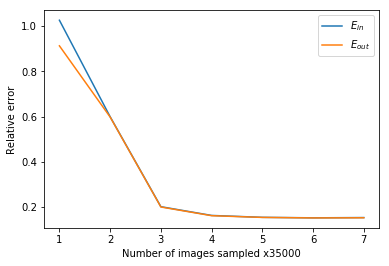

Epsilon = 0.000963827726942
Estimating delta...
Iteration 1 had epsilon = 1.99609202998e-05.
Iteration 2 had epsilon = 0.00181314886372.
Iteration 3 had epsilon = 0.00113081241806.
Iteration 4 had epsilon = 0.0015875396753.
Iteration 5 had epsilon = 0.000826743284161.
Iteration 6 had epsilon = 0.00183284435102.
Iteration 7 had epsilon = 0.00407171165986.
Iteration 8 had epsilon = 0.00398250315253.
Iteration 9 had epsilon = 0.000415572029778.
Iteration 10 had epsilon = 0.00184723758469.
Estimated delta = 0.7


In [20]:
########################################################################
# experimento 1
global features_size
global output_size
features_size = 784
output_size = 10
X = tf.placeholder ("float", [None, features_size], name = 'X')
Y = tf.placeholder ("float", [None, output_size], name = 'Y')

# Defines our model
def createNN (hidden1_size, hidden2_size):
        """ Creates a NN with 2 hidden layers.
            There are 4 layers on total therefore  0 <= l < 4. """
        # dl = dimension of layer l
        d0 = features_size
        d1 = hidden1_size
        d2 = hidden2_size
        d3 = output_size
        learning_rate = 0.001
        
        # Wl = matrix of weights of level (l - 1) => l
        W1 = tf.Variable (tf.random_uniform ([d0, d1], -1, 1))
        W2 = tf.Variable (tf.random_uniform ([d1, d2], -1, 1))
        W3 = tf.Variable (tf.random_uniform ([d2, d3], -1, 1))
        # bl = bias of level (l - 1) => l
        b1 = tf.Variable (tf.random_uniform ([d1], -1, 1))
        b2 = tf.Variable (tf.random_uniform ([d2], -1, 1))
        b3 = tf.Variable (tf.random_uniform ([d3], -1, 1))
        
        
        # sl = signal coming from level l
        # xl = x that comes from level
        # these represents the actual structure of the NN
        x0 = X
        s0 = tf.add (tf.matmul (x0, W1), b1)
        x1 = tf.tanh (s0)
        
        s1 = tf.add (tf.matmul (x1, W2), b2)
        x2 = tf.tanh (s1)
        
        s2 = tf.add (tf.matmul (x2, W3), b3)
        h_y = tf.tanh (s2)
        return h_y

h_y = createNN (100, 50)
cost = tf.reduce_mean (tf.square (Y - h_y))
optimizer = tf.train.GradientDescentOptimizer (0.01).minimize (cost)

init = tf.global_variables_initializer()
sess = tf.Session ()
sess.run (init)


# Train model
e_in_arr = []
e_out_arr = []
for i in range (35000):
    features = np.empty ([1, features_size])
    features[0, :] = data[i, 1:]
    label = np.empty ([1, output_size])
    label[0, :] = int_to_binary_arr (data[i, 0])
    
    # SGD iteration
    _, err = sess.run ([optimizer, cost], {X: features, Y: label})
    
    if (i % 5000 == 0):
        print (str (i + 1) + " iterations complete on training!")
        # Calculates e_in
        e_in = avg_error (data[:i + 1, :], X, Y, cost)
        e_in_arr.append (e_in)
        
        # Calculates e_out
        e_out = avg_error (data[35000:, :], X, Y, cost)
        e_out_arr.append (e_out)

        
# Plots learning curve
labels_list = ['$E_{in}$', '$E_{out}$']
erros_list = [e_in_arr, e_out_arr]
plot_error (7, erros_list, labels_list)


# Prints epsilon
epsilon = abs (e_out_arr[-1] - e_in_arr[-1])
print ("Epsilon = "  + str (epsilon))


# Estimates delta
print ("Estimating delta...")
delta = .0
for i in range (10):
    sess.run (init)
    training_set, validation_set = validation_partition (data, 
                                                         42000 - 7000)
    
    for j in range (training_set.shape[0]):
        features = np.empty ([1, features_size])
        features[0, :] = training_set[j, 1:]
        label = np.empty ([1, output_size])
        label[0, :] = int_to_binary_arr (training_set[j, 0])
        # SGD iteration
        sess.run (optimizer, {X: features, Y: label})
    
    e_in = avg_error (training_set, X, Y, cost)
    e_out = avg_error (validation_set, X, Y, cost)
    
    if (abs (e_in - e_out) > epsilon):
        delta += 1.
    print ("Iteration " + str (i + 1) + " had epsilon = " +
           str (abs (e_in - e_out)) + ".")
delta /= 10
print ("Estimated delta = " + str (delta))

Podemos observar que o modelo generaliza bem porque apresenta epsilon pequeno.

O delta estimado foi alto, o que pode parecer significar que o modelo não generaliza bem na maioria dos casos. Porém, como o valor epsilon foi escolhido arbitrariamente o valor de delta não implica na generalização ruim do modelo. Inclusive, como pudemos observar acima, o epsilon utilizado era próximo de $10^{-3}$ e em todas as outras iterações o valor de $|E_{in} - E_{out}|$ foi menor do que $10^{-2}$, logo podemos confirmar que o modelo generaliza bem.

In [33]:
data_step1 = np.zeros ([42000, 197])
data_step1[:, 0] = data[:, 0]
for i in range (42000):
    img_data = data[i, 1:]
    img_data = img_data.reshape ([28, 28])
    img_data = img_data[::2, ::2]
    img_data = img_data.reshape ([196])
    data_step1[i, 1:] = img_data
print (data_step1.shape)

(42000, 197)


1 iterations complete on training!
5001 iterations complete on training!
10001 iterations complete on training!
15001 iterations complete on training!
20001 iterations complete on training!
25001 iterations complete on training!
30001 iterations complete on training!


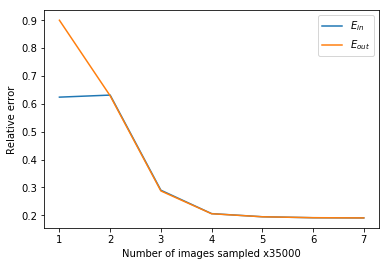

Epsilon = 5.47075791332e-05
Estimating delta...
Iteration 1 had epsilon = 0.00377905450974.
Iteration 2 had epsilon = 0.000134833289896.
Iteration 3 had epsilon = 0.00185630747112.
Iteration 4 had epsilon = 0.00322112437598.
Iteration 5 had epsilon = 0.00406267723441.
Iteration 6 had epsilon = 0.000594787291225.
Iteration 7 had epsilon = 0.000375837323495.
Iteration 8 had epsilon = 0.00210697365573.
Iteration 9 had epsilon = 0.000720829947931.
Iteration 10 had epsilon = 0.00286094531055.
Estimated delta = 1.0


In [34]:
features_size = 196
output_size = 10
X = tf.placeholder ("float", [None, features_size], name = 'X')
Y = tf.placeholder ("float", [None, output_size], name = 'Y')

# Defines our model
def createNN (hidden1_size, hidden2_size):
        """ Creates a NN with 2 hidden layers.
            There are 4 layers on total therefore  0 <= l < 4. """
        # dl = dimension of layer l
        d0 = features_size
        d1 = hidden1_size
        d2 = hidden2_size
        d3 = output_size
        learning_rate = 0.001
        
        # Wl = matrix of weights of level (l - 1) => l
        W1 = tf.Variable (tf.random_uniform ([d0, d1], -1, 1))
        W2 = tf.Variable (tf.random_uniform ([d1, d2], -1, 1))
        W3 = tf.Variable (tf.random_uniform ([d2, d3], -1, 1))
        # bl = bias of level (l - 1) => l
        b1 = tf.Variable (tf.random_uniform ([d1], -1, 1))
        b2 = tf.Variable (tf.random_uniform ([d2], -1, 1))
        b3 = tf.Variable (tf.random_uniform ([d3], -1, 1))
        
        
        # sl = signal coming from level l
        # xl = x that comes from level
        # these represents the actual structure of the NN
        x0 = X
        s0 = tf.add (tf.matmul (x0, W1), b1)
        x1 = tf.tanh (s0)
        
        s1 = tf.add (tf.matmul (x1, W2), b2)
        x2 = tf.tanh (s1)
        
        s2 = tf.add (tf.matmul (x2, W3), b3)
        h_y = tf.tanh (s2)
        return h_y

h_y = createNN (100, 50)
cost = tf.reduce_mean (tf.square (Y - h_y))
optimizer = tf.train.GradientDescentOptimizer (0.01).minimize (cost)

init = tf.global_variables_initializer()
sess = tf.Session ()
sess.run (init)


# Train model
e_in_arr = []
e_out_arr = []
for i in range (35000):
    features = np.empty ([1, features_size])
    features[0, :] = data_step1[i, 1:]
    label = np.empty ([1, output_size])
    label[0, :] = int_to_binary_arr (data_step1[i, 0])
    
    # SGD iteration
    _, err = sess.run ([optimizer, cost], {X: features, Y: label})
    
    if (i % 5000 == 0):
        print (str (i + 1) + " iterations complete on training!")
        # Calculates e_in
        e_in = avg_error (data_step1[:i + 1, :], X, Y, cost)
        e_in_arr.append (e_in)
        
        # Calculates e_out
        e_out = avg_error (data_step1[35000:, :], X, Y, cost)
        e_out_arr.append (e_out)

        
# Plots learning curve
labels_list = ['$E_{in}$', '$E_{out}$']
erros_list = [e_in_arr, e_out_arr]
plot_error (7, erros_list, labels_list)


# Prints epsilon
epsilon = abs (e_out_arr[-1] - e_in_arr[-1])
print ("Epsilon = "  + str (epsilon))


# Estimates delta
print ("Estimating delta...")
delta = .0
for i in range (10):
    sess.run (init)
    training_set, validation_set = validation_partition (data_step1, 
                                                         42000 - 7000)
    
    for j in range (training_set.shape[0]):
        features = np.empty ([1, features_size])
        features[0, :] = training_set[j, 1:]
        label = np.empty ([1, output_size])
        label[0, :] = int_to_binary_arr (training_set[j, 0])
        # SGD iteration
        sess.run (optimizer, {X: features, Y: label})
    
    e_in = avg_error (training_set, X, Y, cost)
    e_out = avg_error (validation_set, X, Y, cost)
    
    if (abs (e_in - e_out) > epsilon):
        delta += 1.
    print ("Iteration " + str (i + 1) + " had epsilon = " +
           str (abs (e_in - e_out)) + ".")
delta /= 10
print ("Estimated delta = " + str (delta))

In [36]:
data_step2 = np.zeros ([42000, 50])
data_step2[:, 0] = data[:, 0]
for i in range (42000):
    img_data = data[i, 1:]
    img_data = img_data.reshape ([28, 28])
    img_data = img_data[::4, ::4]
    img_data = img_data.reshape ([49])
    data_step2[i, 1:] = img_data
print (data_step2.shape)

(42000, 50)


1 iterations complete on training!
5001 iterations complete on training!
10001 iterations complete on training!
15001 iterations complete on training!
20001 iterations complete on training!
25001 iterations complete on training!
30001 iterations complete on training!


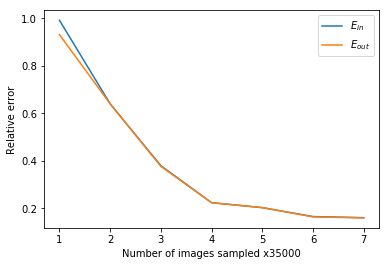

Epsilon = 0.00106798128171
Estimating delta...
Iteration 1 had epsilon = 0.00405578844824.
Iteration 2 had epsilon = 8.35755041668e-05.
Iteration 3 had epsilon = 0.000821844732336.
Iteration 4 had epsilon = 0.00256249145908.
Iteration 5 had epsilon = 0.00112176415345.
Iteration 6 had epsilon = 0.000478553644248.
Iteration 7 had epsilon = 0.00349328249076.
Iteration 8 had epsilon = 0.00156296584947.
Iteration 9 had epsilon = 0.00225158817491.
Iteration 10 had epsilon = 0.00501166352789.
Estimated delta = 0.7


In [38]:
features_size = 49
output_size = 10
X = tf.placeholder ("float", [None, features_size], name = 'X')
Y = tf.placeholder ("float", [None, output_size], name = 'Y')

# Defines our model
def createNN (hidden1_size, hidden2_size):
        """ Creates a NN with 2 hidden layers.
            There are 4 layers on total therefore  0 <= l < 4. """
        # dl = dimension of layer l
        d0 = features_size
        d1 = hidden1_size
        d2 = hidden2_size
        d3 = output_size
        learning_rate = 0.001
        
        # Wl = matrix of weights of level (l - 1) => l
        W1 = tf.Variable (tf.random_uniform ([d0, d1], -1, 1))
        W2 = tf.Variable (tf.random_uniform ([d1, d2], -1, 1))
        W3 = tf.Variable (tf.random_uniform ([d2, d3], -1, 1))
        # bl = bias of level (l - 1) => l
        b1 = tf.Variable (tf.random_uniform ([d1], -1, 1))
        b2 = tf.Variable (tf.random_uniform ([d2], -1, 1))
        b3 = tf.Variable (tf.random_uniform ([d3], -1, 1))
        
        
        # sl = signal coming from level l
        # xl = x that comes from level
        # these represents the actual structure of the NN
        x0 = X
        s0 = tf.add (tf.matmul (x0, W1), b1)
        x1 = tf.tanh (s0)
        
        s1 = tf.add (tf.matmul (x1, W2), b2)
        x2 = tf.tanh (s1)
        
        s2 = tf.add (tf.matmul (x2, W3), b3)
        h_y = tf.tanh (s2)
        return h_y

h_y = createNN (100, 50)
cost = tf.reduce_mean (tf.square (Y - h_y))
optimizer = tf.train.GradientDescentOptimizer (0.01).minimize (cost)

init = tf.global_variables_initializer()
sess = tf.Session ()
sess.run (init)


# Train model
e_in_arr = []
e_out_arr = []
for i in range (35000):
    features = np.empty ([1, features_size])
    features[0, :] = data_step2[i, 1:]
    label = np.empty ([1, output_size])
    label[0, :] = int_to_binary_arr (data_step2[i, 0])
    
    # SGD iteration
    _, err = sess.run ([optimizer, cost], {X: features, Y: label})
    
    if (i % 5000 == 0):
        print (str (i + 1) + " iterations complete on training!")
        # Calculates e_in
        e_in = avg_error (data_step2[:i + 1, :], X, Y, cost)
        e_in_arr.append (e_in)
        
        # Calculates e_out
        e_out = avg_error (data_step2[35000:, :], X, Y, cost)
        e_out_arr.append (e_out)

        
# Plots learning curve
labels_list = ['$E_{in}$', '$E_{out}$']
erros_list = [e_in_arr, e_out_arr]
plot_error (7, erros_list, labels_list)


# Prints epsilon
epsilon = abs (e_out_arr[-1] - e_in_arr[-1])
print ("Epsilon = "  + str (epsilon))


# Estimates delta
print ("Estimating delta...")
delta = .0
for i in range (10):
    sess.run (init)
    training_set, validation_set = validation_partition (data_step2, 
                                                         42000 - 7000)
    
    for j in range (training_set.shape[0]):
        features = np.empty ([1, features_size])
        features[0, :] = training_set[j, 1:]
        label = np.empty ([1, output_size])
        label[0, :] = int_to_binary_arr (training_set[j, 0])
        # SGD iteration
        sess.run (optimizer, {X: features, Y: label})
    
    e_in = avg_error (training_set, X, Y, cost)
    e_out = avg_error (validation_set, X, Y, cost)
    
    if (abs (e_in - e_out) > epsilon):
        delta += 1.
    print ("Iteration " + str (i + 1) + " had epsilon = " +
           str (abs (e_in - e_out)) + ".")
delta /= 10
print ("Estimated delta = " + str (delta))

Label:  7


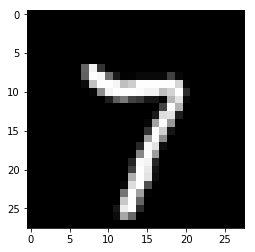

Label:  1


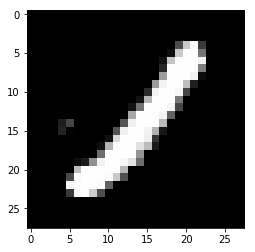

Label:  5


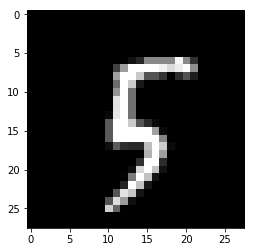

In [21]:
sample = data[0]
print("Label: ", sample[0])
plt.imshow(sample[1:].reshape((28,28)), cmap='gray')
plt.show()

sample = data[1]
print("Label: ", sample[0])
plt.imshow(sample[1:].reshape((28,28)), cmap='gray')
plt.show()

sample = data[20]
print("Label: ", sample[0])
plt.imshow(sample[1:].reshape((28,28)), cmap='gray')
plt.show()

Q2. O método de aprendizado adotado na questão anterior inclui regularização? Caso afirmativo, como? Caso negativo, como formularia a inclusão da regularização e porque esse procedimento melhoraria o resultado?